<a href="https://colab.research.google.com/github/JANANI-B-S/STOCK-MARKET-PREDICTION-USING-LSTM/blob/main/Stock_Market_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn matplotlib tensorflow yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

[*********************100%***********************]  1 of 1 completed


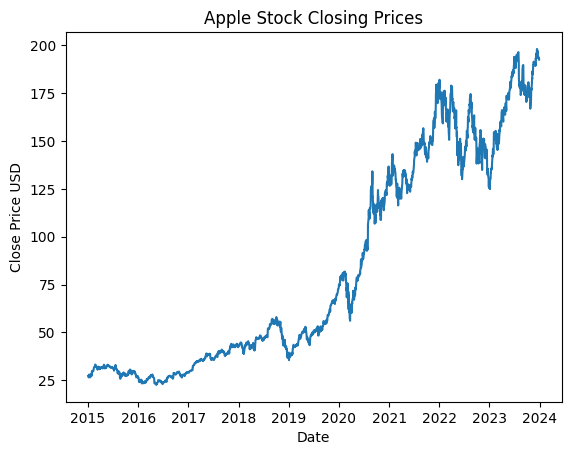

In [ ]:
# Download Apple's stock data from Yahoo Finance
stock_data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')

# Visualize the stock closing price
plt.plot(stock_data['Close'])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

In [ ]:
prediction_days = 60

# Prepare training data
X_train = []
y_train = []

for i in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data to be in the format expected by LSTM layers: (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Adding fully connected layers
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0559
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 5.9563e-04
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 5.7379e-04
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 5.6657e-04
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 5.3004e-04
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - loss: 5.1781e-04
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 5.5550e-04
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 5.5048e-04
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 4.1459e-04
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 4.9539e-04
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 4.5299e-04
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 3.6150e-04
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 3.5912e-04
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 3.5353e-04
Epoch 15/50
69/69 ━━━━━━━━━━━━

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.4894e-04
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 1.2583e-04
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 1.2813e-04
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.1317e-04
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 1.2419e-04
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 1.3654e-04
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 1.2288e-04
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 1.4975e-04
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.4419e-04
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 2.7438e-04
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.8008e-04
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 1.3947e-04
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 1.3595e-04
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.4510e-04
Epoch 15/50
69/

In [ ]:
test_data = stock_data['Close'].values.reshape(-1, 1)
scaled_test_data = scaler.transform(test_data)

X_test = []
y_test = stock_data['Close'][prediction_days:].values

for i in range(prediction_days, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-prediction_days:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


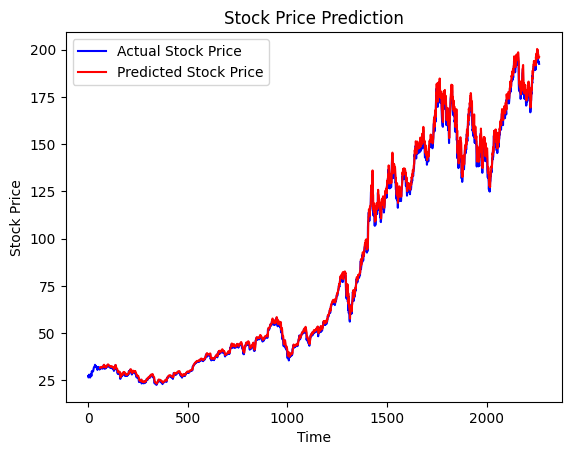

In [ ]:
# Plot the predicted stock prices vs the actual stock prices
plt.plot(stock_data['Close'].values, color="blue", label="Actual Stock Price")
plt.plot(range(prediction_days, len(predicted_stock_price) + prediction_days), predicted_stock_price, color="red", label="Predicted Stock Price")
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Get the portion of test data that corresponds to the predictions
test_data_trimmed = test_data[len(test_data) - len(predicted_stock_price):]

# Calculate RMSE
rmse = np.sqrt(np.mean((predicted_stock_price - test_data_trimmed.reshape(-1, 1))**2))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2.3920755857020275


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(test_data_trimmed, predicted_stock_price)
print(f"R-squared: {r2}")

R-squared: 0.9981792927322105
